# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**:Based on user categories, how does the trip duration vary across the day and across the year

**Answer**: I will be doing an EDA on the dataset for a city selected and compare the duration of different user_types based on the trip_duration

**Question 2**: How does the usage of different user types vary across the year ?

**Answer**: I will compare the the trip durations of each user type in a city by calculating the ratio of user types throughout the day and month to understand which user types demand the system more


> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv']

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    #pp = pprint.PrettyPrinter(indent = 4)
    #pp.pprint(first_trip)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [13]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """    
    # YOUR CODE HERE
    if city == 'NYC':
        duration = float(datum['tripduration']) / 60
    elif city == 'Chicago':
        duration = float(datum['tripduration']) / 60
    elif city == 'Washington':
        duration = float(datum['Duration (ms)']) / 60000
        
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [9]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    if city == 'NYC':
        st_time = datum['starttime']
    # Time format ()'starttime', '1/1/2016 00:09:55'
        time = datetime.strptime(st_time, '%m/%d/%Y %H:%M:%S')
    # Day of the week
        day_of_week = time.strftime("%A")
    #Save the results ina tuple to use in exercie 3b so that individual items can be called
        result = (time.month, time.hour, day_of_week)
        return result

    elif city == 'Chicago':
        st_time = datum['starttime']
    # Time format starttime', '3/31/2016 23:30
        time = datetime.strptime(st_time, '%m/%d/%Y %H:%M')
    # Day of the week
        day_of_week = time.strftime("%A")
        result = (time.month, time.hour, day_of_week)
        return result

    elif city == 'Washington':
        st_time = datum['Start date']
    # Time format ('Start date', '3/31/2016 22:57'),
        time = datetime.strptime(st_time, '%m/%d/%Y %H:%M')
    # Day of the week
        day_of_week = time.strftime("%A")
        result = (time.month, time.hour, day_of_week)
        return result

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [14]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    if city == 'NYC':
        user_type = datum['usertype']
    elif city == 'Chicago':
        user_type = datum['usertype'] 
    elif city == 'Washington':
    # Member type will be either Customer or Subscriber based on Member type - Registered or not    
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    return user_type
      
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [17]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        # To iterate over the trip_reader, convert into a list
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        condensed_trip = {}
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            condensed_trip['duration'] = duration_in_mins(row, city)
            condensed_trip['month'] = time_of_trip(row, city)[0]
            condensed_trip['hour'] = time_of_trip(row, city)[1]
            condensed_trip['day_of_week'] = time_of_trip(row, city)[2]
            condensed_trip['user_type'] = type_of_user(row, city)
            
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(condensed_trip)

In [18]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has the highest number of trips(276,081).NYC also has the highest proportion of subscribers at 89%.
Chicago has the highest number of trips made by short-term customers at 23.77%

In [19]:
def number_of_trips(filename):
    #the number of trips made by subscribers, customers, and total overall.
    city = filename.split('/')[2].split('-')[0]
    reader = csv.DictReader(open(filename))
    n_subscribers = 0
    n_customers = 0
    
    for row in reader:
        if row['user_type'] == 'Subscriber':
            n_subscribers += 1
        if row ['user_type'] == 'Customer':
            n_customers += 1
    
    n_total = int(n_subscribers) + int(n_customers)
    sub_prop = (n_subscribers / n_total) * 100
    cust_prop = (n_customers / n_total) * 100 
    return(n_subscribers, n_customers, n_total, sub_prop, cust_prop, city)

datafiles = ['./data/Washington-2016-Summary.csv',
            './data/Chicago-2016-Summary.csv',
            './data/NYC-2016-Summary.csv']

for datafile in datafiles:
    n_subscribers, n_customers, n_total, sub_prop, cust_prop, city = number_of_trips(datafile)
    print("the number of trips made by subscribers - {}, customers - {}, and total overall- {},subscribers proportion - {}, customer's proportion - {} in city- {}".format(n_subscribers, n_customers, n_total, sub_prop, cust_prop, city))

the number of trips made by subscribers - 51753, customers - 14573, and total overall- 66326,subscribers proportion - 78.0282242257938, customer's proportion - 21.971775774206193 in city- Washington
the number of trips made by subscribers - 54982, customers - 17149, and total overall- 72131,subscribers proportion - 76.22520136973007, customer's proportion - 23.774798630269924 in city- Chicago
the number of trips made by subscribers - 245896, customers - 30185, and total overall- 276081,subscribers proportion - 89.06661450806104, customer's proportion - 10.93338549193896 in city- NYC


In [20]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file = './examples/BayArea-Y3-Summary.csv'
n_subscribers, n_customers, n_total, sub_prop, cust_prop, city = number_of_trips(datafile)
print("the number of trips made by subscribers - {}, customers - {}, and total overall- {},subscribers proportion - {}, customer's proportion - {} in city- {}".format(n_subscribers, n_customers, n_total, sub_prop, cust_prop, city))

the number of trips made by subscribers - 245896, customers - 30185, and total overall- 276081,subscribers proportion - 89.06661450806104, customer's proportion - 10.93338549193896 in city- NYC


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
Average duration is 18.93287355913721, proportion of rides > 30 min - 10.83888671109369 in city - Washington
Average duration is 16.563629368787335, proportion of rides > 30 min - 8.332062497400562 in city - Chicago
Average duration is 15.81259299802294, proportion of rides > 30 min - 7.3024371563378345 in city - NYC

In [23]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def user_rides(filename):
    city = filename.split('-')[0].split('/')[2]
    reader = csv.DictReader(open(filename))
    n_cust = 0
    n_sub = 0
    cust_dur = 0
    sub_dur = 0
    for row in reader:
        if row['user_type'] == 'Customer':
            n_cust += 1
            cust_dur += float(row['duration'])
        elif row['user_type'] == 'Subscriber':
            n_sub += 1
            sub_dur += float(row['duration'])
    avg_ride_cust = cust_dur / n_cust
    avg_ride_sub = sub_dur / n_sub
    
    return(city, avg_ride_sub, avg_ride_cust)    
            

datafiles = ['./data/Washington-2016-Summary.csv',
            './data/Chicago-2016-Summary.csv',
            './data/NYC-2016-Summary.csv']
for datafile in datafiles:
    city, avg_ride_sub, avg_ride_cust = user_rides(datafile)
    print("City- {}, Subscriber average duration - {}, Customer average duration -{}".format(city, avg_ride_sub, avg_ride_cust))

City- Washington, Subscriber average duration - 12.528120499294745, Customer average duration -41.67803139252976
City- Chicago, Subscriber average duration - 12.067201690250076, Customer average duration -30.979781133982506
City- NYC, Subscriber average duration - 13.680790523907177, Customer average duration -32.982004306775025


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: For all cities, Customer have the longer duration of average rides as compared to subscribers
Washington Customer 41.67803139252976
Chicago Customer 30.979781133982506
NYC Customer 32.982004306775025
############
City- Washington, Subscriber average duration - 12.528120499294745, Customer average duration -41.67803139252976
City- Chicago, Subscriber average duration - 12.067201690250076, Customer average duration -30.979781133982506
City- NYC, Subscriber average duration - 13.680790523907177, Customer average duration -32.982004306775025

In [25]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def user_rides(filename):
    city = filename.split('-')[0].split('/')[2]
    reader = csv.DictReader(open(filename))
    n_cust = 0
    n_sub = 0
    cust_dur = 0
    sub_dur = 0
    for row in reader:
        if row['user_type'] == 'Customer':
            n_cust += 1
            cust_dur += float(row['duration'])
        elif row['user_type'] == 'Subscriber':
            n_sub += 1
            sub_dur += float(row['duration'])
    avg_ride_cust = cust_dur / n_cust
    avg_ride_sub = sub_dur / n_sub
    
    return(city, avg_ride_sub, avg_ride_cust)    
            

datafiles = ['./data/Washington-2016-Summary.csv',
            './data/Chicago-2016-Summary.csv',
            './data/NYC-2016-Summary.csv']
for datafile in datafiles:
    city, avg_ride_sub, avg_ride_cust = user_rides(datafile)
    print("City- {}, Subscriber average duration - {}, Customer average duration -{}".format(city, avg_ride_sub, avg_ride_cust))

City- Washington, Subscriber average duration - 12.528120499294745, Customer average duration -41.67803139252976
City- Chicago, Subscriber average duration - 12.067201690250076, Customer average duration -30.979781133982506
City- NYC, Subscriber average duration - 13.680790523907177, Customer average duration -32.982004306775025


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

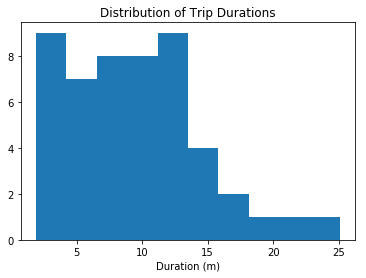

In [26]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

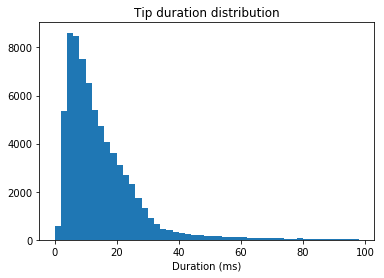

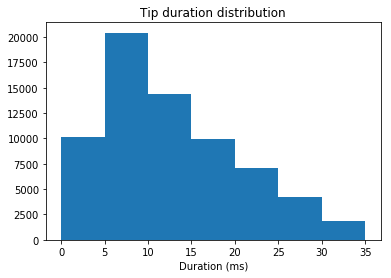

end


'end'

In [6]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
filename = './data/Chicago-2016-Summary.csv'
reader = pd.read_csv(filename)
duration = reader['duration']
bins = np.arange(0, 100, 2)
plt.hist(duration, bins)
plt.title('Tip duration distribution')
plt.xlabel('Duration (ms)')
plt.show()

plt.hist(duration, bins = np.arange(0, 40, 5))
plt.title('Tip duration distribution')
plt.xlabel('Duration (ms)')
plt.show()

input()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: For the city of Chicago, majority of the subscriber use the bikes between 5-10 min. For customers the peak duration is mostly between 20-25 min. The shape of the distribution is almost bell-shaped and more skewed to the right of the distribution for subscribers than it is for the customers.

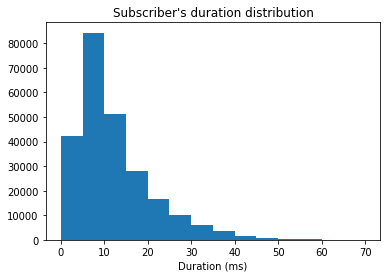

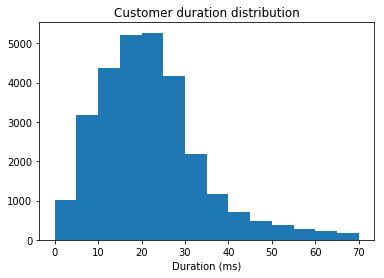

end


'end'

In [3]:
## Use this and additional cells to answer Question 5. ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#create a dataframe
trip_time = pd.read_csv('./data/NYC-2016-Summary.csv')
#using query
subscribers = trip_time.query('user_type == "Subscriber"')
sub1 = subscribers.query('duration < 75')
sub_duration = sub1['duration']

bins = np.arange(0, 75, 5)
plt.hist(sub_duration, bins)
plt.title('Subscriber\'s duration distribution')
plt.xlabel('Duration (ms)')
plt.show()

#create a dataframe
trip_time = pd.read_csv('./data/NYC-2016-Summary.csv')
#using query
customers = trip_time.query('user_type == "Customer"')
cust = customers.query('duration < 75')
cust_duration = cust['duration']

bins = np.arange(0,75,5)
plt.hist(cust_duration, bins)
plt.title('Customer duration distribution')
plt.xlabel('Duration (ms)')
plt.show()
input()


<a id='eda_continued'></a>
## Performing Your Own Analysis

From the initial exploration into the data available, the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers has been explored. For one of these cities, I have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. 
I will be exploring the below 2 questions - which has been listed as below - 6a, 6b and 6c

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**6a** How does ridership differ by month or season? Which month / season has the highest ridership?

**Answer - 6a**: The trip duration is low during the Q1 and and starts to climb and reached the peak in the 8th month - Aug and starts to drop from Winter. The distibution is unimodal and skewed to the left with the peak number of users in the 9th month.

**6b** Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
**Answer*** Yes, it is high during the first 2 months and then becomes low between months 4-8 and then starts to climb from month 10 as there are lesser customers. The distribution is quite the inverse of the trip duration distribution and this indicates there are more customers from months - 2-10, than the other months

**6c** During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?
    **Answer** The distribution is bimodal with 2 peaks observed. The first peak is observed between 8-9am when users would be on their way to work and the second peak is between 5-6pm when user return back home. Yes there is a difference. Subscriber's distribution is bimodal with first peak at  8-9am and second peak between 5-6pm, usage is seen to drop between 10 am to 3pm , whereas for customers, the overall trip duration is seen to increase during the same. 

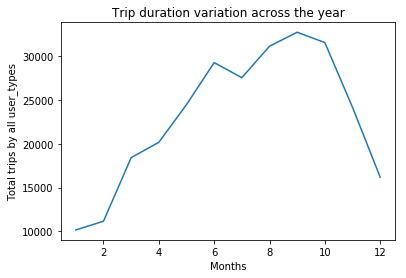

In [2]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                 ##
# **6a**
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

nycdata = pd.read_csv('./data/NYC-2016-Summary.csv')
duration = nycdata.groupby('month').count()['duration']
plt.plot(duration)
plt.title('Trip duration variation across the year')
plt.xlabel('Months')
plt.ylabel('Total trips by all user_types')
plt.show()

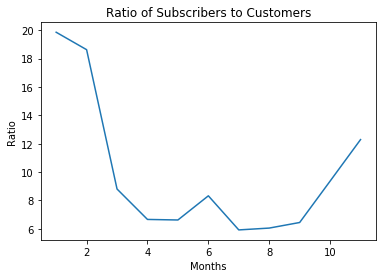

In [4]:
#6b
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
nycdata = pd.read_csv('./data/NYC-2016-Summary.csv')
a = nycdata.groupby(['month', 'user_type']).count()['duration']
ratio = []
for i in range(1, 12):
    ratio.append(a[i]['Subscriber'] / a[i]['Customer'])
plt.plot([i for i in range(1, 12)], ratio)
plt.title('Ratio of Subscribers to Customers')
plt.xlabel('Months')
plt.ylabel('Ratio')
plt.show()

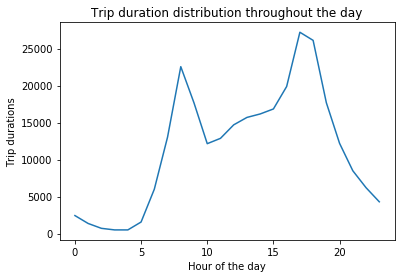

In [5]:
#6c
#During what time of day is the system used the most? 
nycdata = pd.read_csv('./data/NYC-2016-Summary.csv')
a = nycdata.groupby('hour').count()['duration']
plt.plot(a)
plt.title('Trip duration distribution throughout the day')
plt.xlabel('Hour of the day')
plt.ylabel('Trip durations')
plt.show()

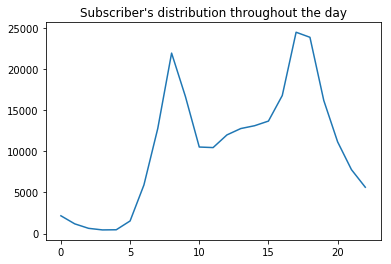

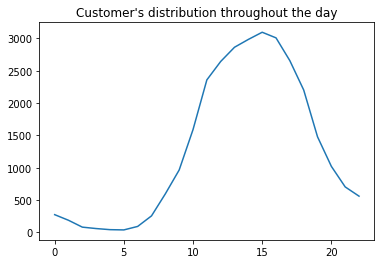

In [6]:
#6c
#Is there a difference in usage patterns for Subscribers and Customers?
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
nycdata = pd.read_csv('./data/NYC-2016-Summary.csv')
a = nycdata.groupby(['hour', 'user_type']).count()['duration']
sub = []
cust= []
for i in range(0, 23):
    sub.append(a[i]['Subscriber'])
    cust.append(a[i]['Customer'])
    
#
plt.plot([i for i in range(0, 23)], sub)
plt.title('Subscriber\'s distribution throughout the day')
plt.show()
plt.plot([i for i in range(0, 23)], cust)
plt.title('Customer\'s distribution throughout the day')
plt.show()

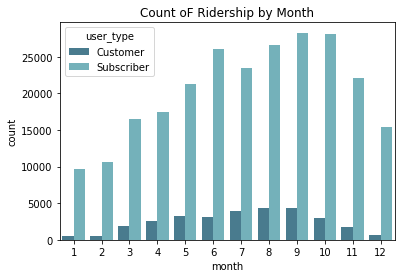

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nycdata = pd.read_csv('./data/NYC-2016-Summary.csv')
sns.countplot(x = 'month', data = nycdata, hue ='user_type', palette = 'GnBu_d')
plt.title('Count oF Ridership by Month')
plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to apply to apply Data Science to the field on cricket, especially the IPL to decide which team has the higher chances of winning the IPL for this year based on the last 5 years.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0